In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d0 = pd.read_csv('train.csv')
d0.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
l = d0['label']
d = d0.drop("label",axis=1)

In [4]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


/home/rj/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


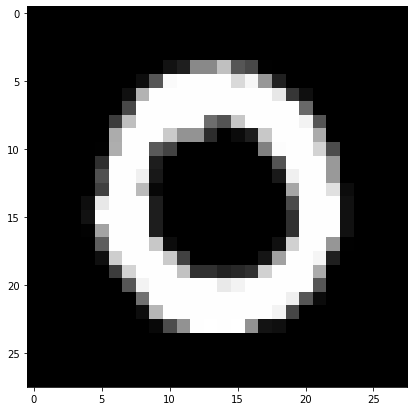

0

In [6]:
plt.figure(figsize=(7,7))
idx=1
grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation="none",cmap="gray")
plt.show()
l[idx]

In [10]:
#2D visualization using pca
labels = l.head(15000)
data = d.head(15000)


In [11]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)

In [12]:
sample_data = standardized_data
covar_matrix = np.matmul(sample_data.T,sample_data)
covar_matrix.shape

(784, 784)

In [13]:
from scipy.linalg import eigh
values,vectors = eigh(covar_matrix,eigvals=(782,783))
print("shape of eigen vectors=",vectors.shape)
vectors = vectors.T
print("updated shape of eigen vectors=",vectors.shape)


shape of eigen vectors= (784, 2)
updated shape of eigen vectors= (2, 784)


In [17]:
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
new_coordinates = np.matmul(vectors,sample_data.T)
new_coordinates.shape

(2, 15000)

In [18]:
new_coordinates = np.vstack((new_coordinates,labels)).T
df = pd.DataFrame(data=new_coordinates,columns=("1st_principal","2nd_principal","label"))
df.head()

,1st_principal,2nd_principal,label
0,-5.558661,-5.043558,1.0
1,6.193635,19.305278,0.0
2,-1.909878,-7.678775,1.0
3,5.525748,-0.464845,4.0
4,6.366527,26.644289,0.0


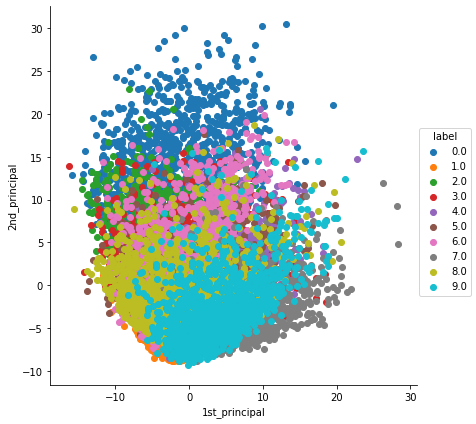

In [20]:
sns.FacetGrid(df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [21]:
#pca using scikit-learn


In [22]:
from sklearn import decomposition
pca = decomposition.PCA()

In [33]:
pca.n_components = 2
pca_data = pca.fit_transform(sample_data)
pca_data.shape

(15000, 2)

In [49]:
pca_data = np.vstack((pca_data.T,labels)).T
# pca_df = pd.DataFrame(data=pca_data,columns=("1st_principal","2nd_principal","label"))
# pca_df.head()
# sns.FacetGrid(pca_df,hue="label",size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
# plt.show()

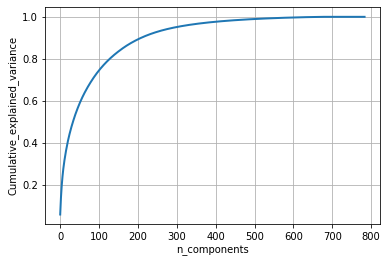

In [50]:
#pca for dimensional redn
pca.n_components = 784
pca_data = pca.fit_transform(sample_data)
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_);
cum_var_explained = np.cumsum(percentage_var_explained)
# Plot the PCA spectrum
plt.figure(1, figsize=(6, 4))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative_explained_variance')
plt.show()

# tsne

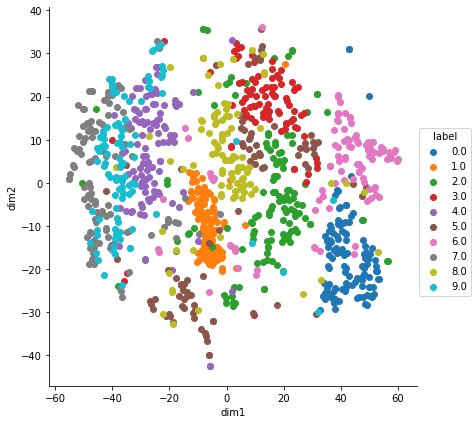

In [51]:
from sklearn.manifold import TSNE
data_1000 = standardized_data[0:1000,:]
labels_1000 = labels[0:1000]
model = TSNE(n_components=2,random_state=0)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("dim1","dim2","label"))
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.show()

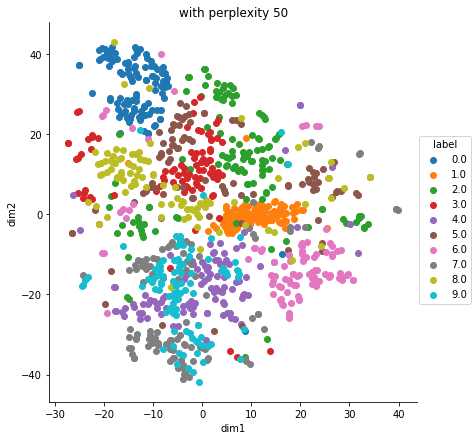

In [52]:
model = TSNE(n_components=2,random_state=0,perplexity=50)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("dim1","dim2","label"))
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.title('with perplexity 50')
plt.show()

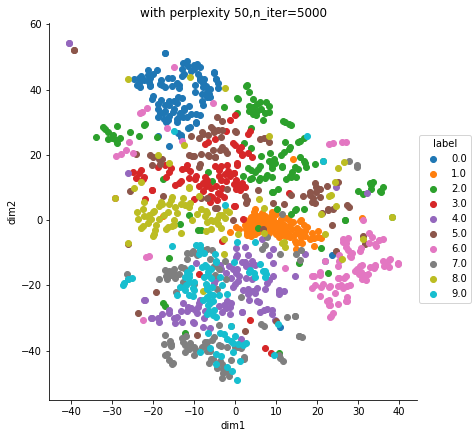

In [53]:
model = TSNE(n_components=2,random_state=0,perplexity=50,n_iter=5000)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("dim1","dim2","label"))
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.title('with perplexity 50,n_iter=5000')
plt.show()

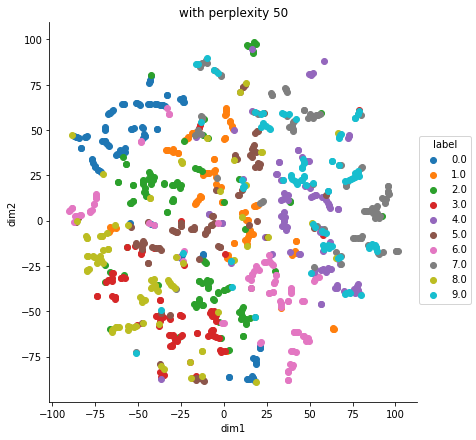

In [54]:
model = TSNE(n_components=2,random_state=0,perplexity=2)
tsne_data = model.fit_transform(data_1000)
tsne_data = np.vstack((tsne_data.T,labels_1000)).T
tsne_df = pd.DataFrame(data=tsne_data,columns=("dim1","dim2","label"))
sns.FacetGrid(tsne_df,hue="label",size=6).map(plt.scatter,'dim1','dim2').add_legend()
plt.title('with perplexity 50')
plt.show()